# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('Data/loan_data_2007_2014.csv', index_col = 0)

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(466285, 74)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

------------

# 2.Target Variable

Dikarenakan project ini untuk mengetahui bad loan & good loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 1) dan good loan (sebagai 0).

In [6]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [7]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)' 
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0

loan_data['good_bad'] = np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'])
                        , 1 , 0)

In [8]:
# Melihat distribusi 0 dan 1
loan_data['good_bad'].value_counts()

0    414099
1     52186
Name: good_bad, dtype: int64

In [9]:
# 1=Bad 0=Good
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
...,...,...
466280,Current,0
466281,Charged Off,1
466282,Current,0
466283,Fully Paid,0


In [10]:
loan_data['good_bad'].value_counts(normalize=True)

0    0.888081
1    0.111919
Name: good_bad, dtype: float64

In [11]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


In [12]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis=1, inplace=True)

In [13]:
# Cek missing values yang tersisa
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0]>0.50]
missing_values.sort_values((0), ascending=True)

,0


---------

# 3.Data Splitting

In [14]:
loan_data.shape

(466285, 54)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state=42)

In [18]:
X_train.shape, X_test.shape

((373028, 53), (93257, 53))

In [19]:
y_train.value_counts(normalize=True)

0    0.888081
1    0.111919
Name: good_bad, dtype: float64

In [20]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

0    0.888083
1    0.111917
Name: good_bad, dtype: float64

--------------------

# 4.Data Cleaning

In [21]:
# Terdapat 53 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape

(373028, 53)

In [22]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

for col in X_train.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
[' 60 months' ' 36 months']

grade
['C' 'D' 'A' 'B' 'E' 'F' 'G']

sub_grade
['C1' 'D1' 'A1' 'B5' 'B4' 'B2' 'B3' 'C3' 'C5' 'A4' 'E3' 'A5' 'D4' 'A3'
 'D2' 'E5' 'C4' 'D5' 'E1' 'E2' 'F3' 'B1' 'C2' 'D3' 'F1' 'F4' 'A2' 'G3'
 'E4' 'G4' 'G1' 'F5' 'F2' 'G2' 'G5']

emp_title
['Research Associate (Assistant Professor)' 'Volunteer Coordinator'
 'Plant Manger ' ... 'AMR Group' 'Dallas Can Academy' 'Tax Return Center']

emp_length
['9 years' '2 years' '10+ years' '1 year' '< 1 year' '8 years' nan
 '6 years' '3 years' '4 years' '5 years' '7 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Not Verified' 'Source Verified']

issue_d
['Jul-14' 'Oct-13' 'Mar-14' 'Oct-14' 'Aug-11' 'Aug-12' 'Apr-13' 'Nov-07'
 'Jun-12' 'Jul-08' 'Jun-14' 'Sep-13' 'Jul-13' 'May-13' 'Feb-12' 'Jun-10'
 'Jun-13' 'Apr-14' 'Jul-12' 'Aug-14' 'Nov-13' 'Jan-14' 'Dec-13' 'Dec-14'
 'Feb-14' 'Dec-12' 'May-11' 'Nov-12' 'Sep-14' 'Feb-13' 'Nov-14' 'Sep-11'
 'Jan-13' 'May-14' 'Jun-

['Jan-16' 'Dec-13' 'Mar-15' 'Aug-15' 'Oct-15' 'Feb-13' 'Nov-14' 'Nov-10'
 'Jan-14' 'Sep-11' 'Apr-15' 'Aug-14' 'Jul-13' 'Nov-13' 'Jun-15' 'May-15'
 'Dec-15' 'Jul-15' 'Sep-12' 'Sep-14' 'Aug-11' 'Aug-13' 'Mar-14' 'Nov-15'
 'Jun-13' 'Oct-14' 'Aug-10' 'Jul-14' 'Dec-14' 'Jan-15' 'Sep-13' 'May-13'
 'Apr-14' 'Aug-12' 'Feb-14' 'Oct-13' 'May-14' 'Sep-15' 'Feb-15' 'Mar-11'
 'Jun-14' 'Nov-08' 'Jul-12' 'Feb-12' 'Jan-13' 'Oct-10' 'Mar-13' 'Feb-09'
 'Oct-12' 'Dec-12' 'Nov-12' nan 'Oct-11' 'Sep-10' 'May-12' 'Dec-11'
 'Jul-11' 'Dec-10' 'Feb-10' 'May-11' 'Apr-13' 'Feb-11' 'Mar-12' 'Jun-12'
 'Jun-11' 'Jan-11' 'Apr-12' 'Aug-09' 'Jan-12' 'Sep-09' 'Nov-11' 'Sep-08'
 'Apr-11' 'Jul-10' 'Oct-09' 'Apr-10' 'Jun-10' 'Jun-09' 'Dec-09' 'May-10'
 'Jul-09' 'Jul-08' 'Nov-09' 'Jan-10' 'Oct-08' 'Mar-10' 'May-09' 'Dec-08'
 'Aug-08' 'Jan-09' 'Apr-09' 'Mar-09' 'May-08' 'Apr-08' 'Jun-08' 'Mar-08'
 'Feb-08' 'Jan-08' 'Dec-07']

next_pymnt_d
['Jan-16' nan 'Feb-16' 'Sep-11' 'Sep-12' 'Nov-09' 'Mar-09' 'Jun-12'
 'Dec-12' 'Feb-11'

In [23]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [24]:
# Convert data type menjadi numeric 
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [25]:
X_train['term']

335623    60
82177     36
339560    36
429575    36
264917    36
          ..
85335     36
400460    36
3982      60
280424    36
354718    36
Name: term, Length: 373028, dtype: int64

In [26]:
# Cek values apa saja yang harus di cleaning
X_train['emp_length'].unique()

array(['9 years', '2 years', '10+ years', '1 year', '< 1 year', '8 years',
       nan, '6 years', '3 years', '4 years', '5 years', '7 years'],
      dtype=object)

In [27]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [28]:
X_train['emp_length']

335623     9
82177      2
339560    10
429575    10
264917     1
          ..
85335      2
400460     4
3982       4
280424     1
354718     0
Name: emp_length, Length: 373028, dtype: int64

In [29]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,Jul-14,Apr-92,Jan-16,Jan-16,Jan-16
82177,Oct-13,Oct-94,Dec-13,NaN,May-14
339560,Jul-14,Mar-94,Mar-15,NaN,Mar-15
429575,Mar-14,Feb-00,Aug-15,NaN,Jan-16
264917,Oct-14,Mar-01,Oct-15,Jan-16,Jan-16
...,...,...,...,...,...
85335,Sep-13,Jun-89,Jan-16,Jan-16,Jan-16
400460,Apr-14,Aug-99,Jan-16,Feb-16,Jan-16
3982,Nov-11,Feb-03,Jun-12,NaN,Nov-12
280424,Oct-14,Jul-92,Jan-16,Jan-16,Jan-16


In [30]:
# Mengganti yang bertipe data object ke datetimes64
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'], format = ("%b-%y"))

In [31]:
# Mengganti yang bertipe data object ke datetimes64
X_train['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line'], format = ("%b-%y"))
X_train['last_pymnt_d'] = pd.to_datetime(X_train['last_pymnt_d'], format = ("%b-%y"))
X_train['next_pymnt_d'] = pd.to_datetime(X_train['next_pymnt_d'], format = ("%b-%y"))
X_train['last_credit_pull_d'] = pd.to_datetime(X_train['last_credit_pull_d'], format = ("%b-%y"))

In [32]:
# Lakukan hal yang sama untuk X_test
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

In [33]:
# Mengganti yang bertipe data object ke datetimes64
X_test['issue_d'] = pd.to_datetime(X_test['issue_d'], format = ("%b-%y"))

In [34]:
# Mengganti yang bertipe data object ke datetimes64
X_test['earliest_cr_line'] = pd.to_datetime(X_test['earliest_cr_line'], format = ("%b-%y"))
X_test['last_pymnt_d'] = pd.to_datetime(X_test['last_pymnt_d'], format = ("%b-%y"))
X_test['next_pymnt_d'] = pd.to_datetime(X_test['next_pymnt_d'], format = ("%b-%y"))
X_test['last_credit_pull_d'] = pd.to_datetime(X_test['last_credit_pull_d'], format = ("%b-%y"))

In [35]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,2014-07-01,1992-04-01,2016-01-01,2016-01-01,2016-01-01
82177,2013-10-01,1994-10-01,2013-12-01,NaT,2014-05-01
339560,2014-07-01,1994-03-01,2015-03-01,NaT,2015-03-01
429575,2014-03-01,2000-02-01,2015-08-01,NaT,2016-01-01
264917,2014-10-01,2001-03-01,2015-10-01,2016-01-01,2016-01-01
...,...,...,...,...,...
85335,2013-09-01,1989-06-01,2016-01-01,2016-01-01,2016-01-01
400460,2014-04-01,1999-08-01,2016-01-01,2016-02-01,2016-01-01
3982,2011-11-01,2003-02-01,2012-06-01,NaT,2012-11-01
280424,2014-10-01,1992-07-01,2016-01-01,2016-01-01,2016-01-01


In [36]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93257 entries, 38664 to 89759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   term                93257 non-null  int64         
 1   emp_length          93257 non-null  int64         
 2   issue_d             93257 non-null  datetime64[ns]
 3   earliest_cr_line    93252 non-null  datetime64[ns]
 4   last_pymnt_d        93187 non-null  datetime64[ns]
 5   next_pymnt_d        47770 non-null  datetime64[ns]
 6   last_credit_pull_d  93246 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 5.7 MB


-----------------

# 5. Feature Engineering

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 53), (373028,), (93257, 53), (93257,))

In [38]:
# Kolom yang akan di gunakan
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [39]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [40]:
# tidak dibutuhkan untuk modelling
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [41]:
X_train.shape, X_test.shape

((373028, 6), (93257, 6))

In [42]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-04-01'

In [43]:
# feature engineering untuk date columns
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)
    
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [44]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [45]:
X_test.isnull().sum()

term                              0
emp_length                        0
mths_since_earliest_cr_line       5
mths_since_issue_d                0
mths_since_last_pymnt_d          70
mths_since_last_credit_pull_d    11
dtype: int64

In [46]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line       24
mths_since_issue_d                 0
mths_since_last_pymnt_d          306
mths_since_last_credit_pull_d     31
dtype: int64

In [47]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [48]:
X_test.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [49]:
X_train.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

------------

# 6. Modelling

In [74]:
from sklearn.neighbors import KNeighborsClassifier as KNN #pembuatan model KNeighbors Classifier

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score #evaluasi dan performa

In [77]:
KNN_model = KNN()
KNN_model = KNN_model.fit(X_train, y_train)

In [80]:
#melakukan prediksi pada data test
y_pred_KNN = KNN_model.predict(X_test)

#check performa dari model menggunakan classification_report
print(classification_report(y_test, y_pred_KNN))

#evaluasi model
acc_score_KNN = round(accuracy_score(y_pred_KNN, y_test), 3)
print('Accuracy model KNeighbors Classifier : ', acc_score_KNN)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     82820
           1       0.57      0.34      0.43     10437

    accuracy                           0.90     93257
   macro avg       0.74      0.65      0.68     93257
weighted avg       0.88      0.90      0.89     93257

Accuracy model KNeighbors Classifier :  0.897


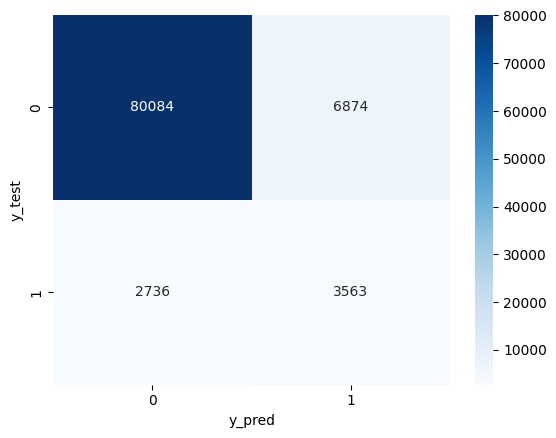

In [86]:
#confussion Matrix
cm_KNN = confusion_matrix(y_pred_KNN, y_test)
sns.heatmap(cm_KNN, annot = True, fmt='d', cmap=plt.cm.Blues);

plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()